In [1]:
import pandas as pd
import numpy as np
import datetime
from sqlalchemy import create_engine
from scipy import stats
from scipy.stats import linregress
from matplotlib import pyplot as plt


In [4]:
csv_file = "../Resources/yelp_academic_dataset_business.csv"

In [5]:
yelp_df = pd.read_csv(csv_file, error_bad_lines=False)

/Users/gregorymaginn/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,5,8,15,18,21,27,30,43,49,52,62,64,66,70,84,89,92,100) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
cleand_yelp = pd.DataFrame(yelp_df["business_id"], yelp_df["attributes.Ambience.divey"], )

In [7]:
yelp_df

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,vcNAWiLM4dR7D2nwwJ7nCA,NaN,NaN,NaN,8:00,NaN,NaN,NaN,NaN,8:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JwUE5GmEO-sH1FuwJgKBlQ,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
2,uGykseHzyS5xAMWoN6YUqA,False,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
3,LRKJF43s9-3jG9Lgx4zODg,NaN,NaN,NaN,10:30,NaN,NaN,NaN,NaN,10:30,...,NaN,casual,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,RgDg-k9S5YD_BaxMckifkg,NaN,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,...,NaN,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42148,uUsfpN81JCMKyH6c0D0bTg,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,casual,NaN,True,Summerlin,NaN,False,NaN,NaN,False
42149,tsvWY4o64xiv7K0VA89R8A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Capitol,NaN,NaN,NaN,NaN,NaN
42150,nYer89hXYAoddMEKTxw7kA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42151,BMjggIgOghBMEXPo8q7q3w,False,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False


In [8]:
yelp_df.count()

#business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,
#attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,
#attributes.Hair Types Specialized In.africanamerican,
#attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,categories,
#latitude,attributes.Outdoor Seating,attributes.Alcohol,
#attributes.Ambience.classy,attributes.Payment Types.mastercard,
#attributes.Parking.lot,attributes.Ambience.touristy,attributes.Corkage,hours.Tuesday.open,attributes.Good For.brunch,attributes.Payment Types.amex,name,hours.Monday.open,attributes.Waiter Service,attributes.Parking.street,attributes.Ambience.hipster,attributes.BYOB/Corkage,attributes.Hair Types Specialized In.straightperms,attributes.Music.live,attributes.Dietary Restrictions.dairy-free,attributes.Music.background_music,attributes.Price Range,attributes.Good For.breakfast,attributes.Parking.garage,attributes.Music.karaoke,attributes.Good For Dancing,review_count,attributes.Hair Types Specialized In.asian,state,attributes.Accepts Credit Cards,hours.Friday.close,attributes.Good For.lunch,attributes.Good For Kids,attributes.Parking.valet,attributes.Take-out,full_address,hours.Thursday.close,attributes.Hair Types Specialized In.coloring,attributes.Payment Types.cash_only,attributes.Good For.dessert,attributes.Music.video,attributes.Dietary Restrictions.halal,attributes.Takes Reservations,hours.Saturday.open,attributes.Ages Allowed,attributes.Ambience.trendy,attributes.Delivery,hours.Wednesday.close,attributes.Wi-Fi,open,city,attributes.Payment Types.discover,attributes.Wheelchair Accessible,attributes.Dietary Restrictions.gluten-free,stars,attributes.Payment Types.visa,type,attributes.Caters,attributes.Ambience.intimate,attributes.Music.playlist,attributes.Good For.latenight,attributes.Good For.dinner,attributes.Coat Check,longitude,hours.Monday.close,attributes.Hair Types Specialized In.extensions,hours.Tuesday.close,hours.Saturday.close,attributes.Good for Kids,attributes.Parking.validated,hours.Sunday.open,attributes.Accepts Insurance,attributes.Music.dj,attributes.Dietary Restrictions.soy-free,attributes.Has TV,hours.Sunday.close,attributes.Ambience.casual,attributes.By Appointment Only,attributes.Dietary Restrictions.kosher,attributes.Dogs Allowed,attributes.Drive-Thru,attributes.Dietary Restrictions.vegetarian,hours.Wednesday.open,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale


business_id                                   42153
attributes.Ambience.divey                     11400
attributes.Dietary Restrictions.vegan           116
attributes.Happy Hour                          2436
hours.Thursday.open                           23112
                                              ...  
attributes.Open 24 Hours                        297
attributes.Ambience.romantic                  11912
attributes.Hair Types Specialized In.perms      216
attributes.Music.jukebox                       2117
attributes.Ambience.upscale                   11806
Length: 105, dtype: int64

In [9]:
groupedlist = yelp_df.groupby(yelp_df.city).count()
groupedlist

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
city,,,,,,,,,,,,,,,,,,,,,
Ahwatukee,8,3,0,1,7,0,0,0,0,7,...,1,3,0,3,0,0,3,0,1,3
Anthem,63,18,0,1,27,0,0,0,2,26,...,1,21,0,22,0,0,18,0,0,18
Apache Junction,91,36,0,4,32,0,0,0,0,32,...,4,42,0,40,0,0,36,0,4,36
Arcadia,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlanta,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windsor,7,1,0,0,4,0,0,0,0,4,...,0,2,0,2,0,0,1,0,0,1
Wittmann,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Woolwich,2,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [10]:
bigCities = groupedlist.loc[groupedlist['business_id'] > 1000]

In [11]:
bigCities.business_id

city
Chandler       1637
Edinburgh      2887
Gilbert        1049
Glendale       1196
Henderson      1914
Las Vegas     12022
Madison        1630
Mesa           2041
Phoenix        7499
Scottsdale     3605
Tempe          2025
Name: business_id, dtype: int64

In [12]:
Edinburgh_df = yelp_df.loc[yelp_df.city == 'Edinburgh']

In [13]:
Edinburgh_df

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
19835,W3THJEcoHZZKgdJJdiFIWw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,West End;New Town,NaN,NaN,NaN,NaN,NaN
19836,aFVO6hoFlOCN8pKsmJbWjw,False,NaN,False,12:00,NaN,NaN,NaN,NaN,12:00,...,no,casual,NaN,True,Old Town;Royal Mile,NaN,False,NaN,NaN,False
19837,7Iuq-HV4iA5InilfGdjMuw,NaN,NaN,NaN,8:30,NaN,NaN,NaN,NaN,8:30,...,NaN,NaN,NaN,NaN,Leith,NaN,NaN,NaN,NaN,NaN
19838,2LZtHTbbN5xA3PcPzFsXlQ,False,NaN,NaN,12:00,NaN,NaN,NaN,NaN,12:00,...,no,NaN,NaN,True,New Town,NaN,False,NaN,True,False
19839,f_adZ5jM1k9uABuleJmGpw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,Newington;Old Town;Royal Mile,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42011,lzQb54_a6dhaHzLHA1d_fw,False,NaN,False,8:00,NaN,NaN,NaN,NaN,8:00,...,outdoor,casual,NaN,True,Grassmarket;Old Town,NaN,False,NaN,NaN,False
42065,ORI4Yt7lQf18z3x1Rih-Tg,False,NaN,NaN,18:00,NaN,NaN,NaN,NaN,12:00,...,NaN,casual,NaN,NaN,NaN,NaN,False,NaN,NaN,False
42125,xT1MO7MLMp3jK4XT1LXiKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,Leith,NaN,NaN,NaN,NaN,NaN
42142,EYpqqsJZ3L2EFAPK-NEOFA,False,NaN,NaN,12:00,NaN,NaN,NaN,NaN,12:00,...,NaN,casual,NaN,True,New Town,NaN,False,NaN,NaN,False


In [14]:
allPrices = yelp_df['attributes.Price Range']
allStars = yelp_df['stars']

print(len(yelp_df))

print(f"allPrices Len {len(allPrices)}")
print(f"allStars Len {len(allStars)}")

42153
allPrices Len 42153
allStars Len 42153


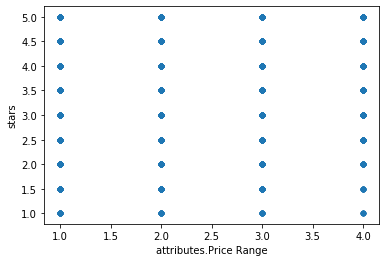

In [15]:
priceRatingPlot = yelp_df.plot.scatter(x = 'attributes.Price Range',
                                y = 'stars')

In [96]:
StarsPrices_df = pd.DataFrame({
    "pricePoint": allPrices,
    "starRating": allStars
})

In [99]:
StarsPrices_df.loc[StarPrices_df["pricePoint"]=="1"]

,pricePoint,starRating
1,1.0,4.0
2,1.0,4.0
3,1.0,4.5
8,2.0,3.5
10,2.0,3.5
...,...,...
42146,2.0,4.5
42147,1.0,5.0
42148,1.0,4.0
42151,2.0,5.0


In [114]:
StarsPrices_df = StarsPrices_df.dropna()

plot_time = StarsPrices_df.groupby(StarsPrices_df['pricePoint']).mean()

In [107]:
oneBuck_df = StarsPrices_df[StarsPrices_df['pricePoint'] ==1]
print(oneBuck_df['starRating'].mean())

twoBuck_df = StarsPrices_df[StarsPrices_df['pricePoint'] ==2]
print(twoBuck_df['starRating'].mean())

threeBuck_df = StarsPrices_df[StarsPrices_df['pricePoint'] ==3]
print(threeBuck_df['starRating'].mean())

fourBuck_df = StarsPrices_df[StarsPrices_df['pricePoint'] ==4]
print(fourBuck_df['starRating'].mean())

3.5719078179696617
3.66440725834922
3.6352648418059013
3.62051649928264


In [18]:
correlation, p_value = stats.pearsonr(StarsPrices_df.pricePoint, StarsPrices_df.starRating)
print(correlation)
print(p_value)

0.036745420871172434
7.958028960569487e-10


In [74]:
y_values = StarsPrices_df['pricePoint']
x_values = StarsPrices_df['starRating']

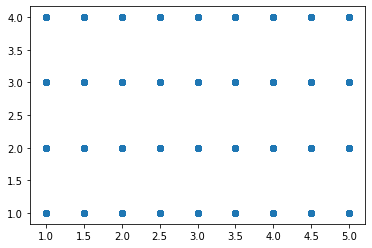

In [75]:
plt.scatter(x_values, y_values)

Text(6, 10, 'y = 0.03x + 1.66')

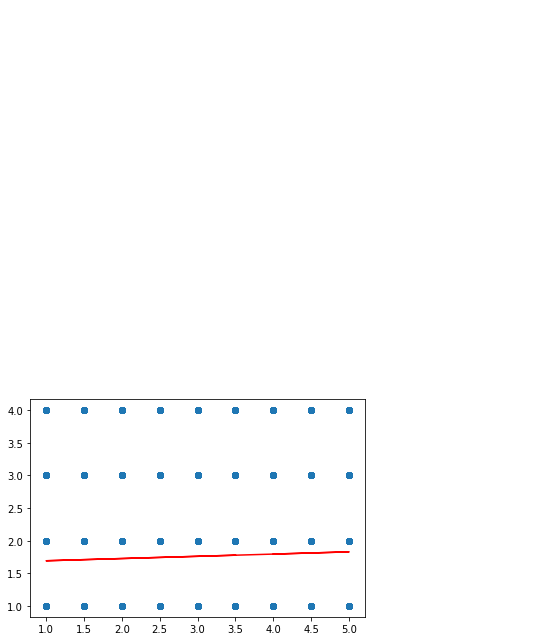

In [76]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [22]:
StarsPrices_df['pricePoint'].value_counts()

2.0    14163
1.0    10284
3.0     2813
4.0      697
Name: pricePoint, dtype: int64

In [23]:
StarsPrices_df['starRating'].value_counts()

4.0    7120
3.5    6950
3.0    4325
4.5    4052
2.5    2350
5.0    1815
2.0     887
1.5     372
1.0      86
Name: starRating, dtype: int64

In [24]:
size_df = pd.DataFrame(StarsPrices_df.groupby('pricePoint')['starRating'].value_counts().unstack('starRating', fill_value=0).reset_index())

In [45]:
size_df

starRating,pricePoint,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,1.0,28,178,392,946,1612,2556,2616,1473,483
1,2.0,25,137,358,1113,2252,3621,3551,1987,1119
2,3.0,21,40,109,221,391,628,776,471,156
3,4.0,12,17,28,70,70,145,177,121,57


In [31]:
for x in size_df[1]:
    print(x)

28
25
21
12


In [68]:
ylist = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
xlist = [1,1,1,1,1.5,1.5,1.5,1.5,2,2,2,2,2.5,2.5,2.5,2.5,3,3,3,3,3.5,3.5,3.5,3.5,4,4,4,4,4.5,4.5,4.5,4.5,5,5,5,5]

In [69]:
len(allsizes)
len(xlist)
len(ylist)

36

In [70]:
graph_df = pd.DataFrame({
    "Sizes":allsizes,
    "X":xlist,
    "Y":ylist
})

In [71]:
graph_df.head()

,Sizes,X,Y
0,28,1.0,1
1,25,1.0,2
2,21,1.0,3
3,12,1.0,4
4,178,1.5,1


In [78]:
x_values = graph_df.X
y_values = graph_df.Y

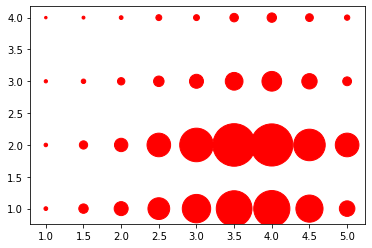

In [85]:
plt.scatter(x_values, y_values, s=(graph_df["Sizes"]/2), color="Red")

Text(6, 10, 'y = 0.0x + 3.0')

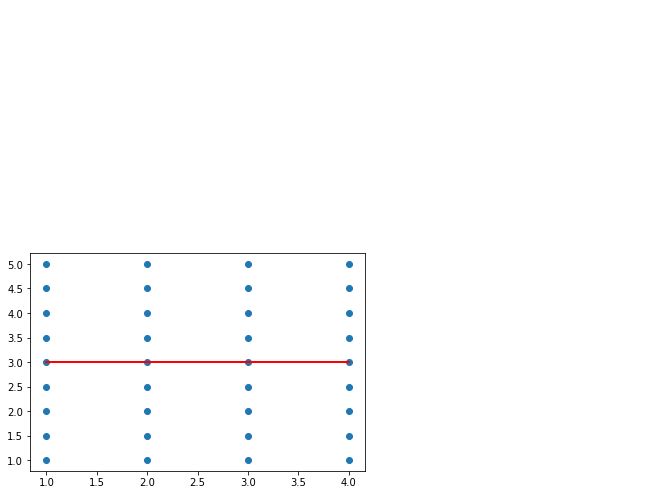